# Exercício 5

Fazer gráfico de comparação da rentabilidade de ativos. Usar a série da VALE (VALE3.SA) no período de 2015-01-01 até 2020-12-31 e comparar com:
1. CDI acumulado no período
1. IBOVESPA
1. IPCA + 6% ao ano

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

## Obtendo dados de Bolsa (ação e índice IBOVESPA)

In [2]:
symbol = ['VALE3.SA', '^BVSP']

In [3]:
data = yf.download(symbol, start='2014-12-30', end='2020-01-01')

[*********************100%***********************]  2 of 2 completed


## Limpeza dos dados faltantes

In [4]:
data.shape

(1242, 12)

In [5]:
data.dropna().shape

(1236, 12)

## Calculando retornos mensais

In [6]:
p = data['Adj Close'].resample('1M').last()

In [7]:
r = p.diff() / p.shift(1)

## Obtendo CDI

In [8]:
from bcb import sgs

In [9]:
cdi = sgs.get(('CDI', 12), start_date='2014-12-30', end_date='2020-01-01')

cdi['month'] = cdi.index.strftime('%Y%m')

cdi_monthly = cdi.groupby('month')['CDI'].apply(lambda x: (1 + x/100).prod() - 1)

## Obtendo IPCA

In [10]:
ipca = sgs.get(('IPCA', 433), start_date='2014-12-30', end_date='2019-12-31')

### Calculando IPCA + 6% ao ano

In [11]:
ipca['IPCA'] = ipca['IPCA'] / 100
ipca['IPCA+6%'] = ipca['IPCA'] + np.power(1 + 6/100, 1/12) - 1

In [12]:
ipca.head()

,IPCA,IPCA+6%
date,,
2014-12-01,0.0078,0.012668
2015-01-01,0.0124,0.017268
2015-02-01,0.0122,0.017068
2015-03-01,0.0132,0.018068
2015-04-01,0.0071,0.011968


## Juntando as séries de taxas

In [13]:
r['CDI'] = cdi_monthly.values
r['IPCA+6%'] = ipca['IPCA+6%'].values
r.iloc[0] = 0

In [14]:
r.head()

,VALE3.SA,^BVSP,CDI,IPCA+6%
Date,,,,
2014-12-31,0.000000,0.000000,0.000000,0.000000
2015-01-31,-0.150616,-0.061971,0.009293,0.017268
2015-02-28,0.141859,0.099663,0.008185,0.017068
2015-03-31,-0.155765,-0.008394,0.010361,0.018068
2015-04-30,0.304405,0.099296,0.009483,0.011968


## Calculando a rentabilidade dos ativos

In [15]:
rentabilidade = 100 * (1 + r).cumprod()

In [16]:
rentabilidade.iloc[0] = 100

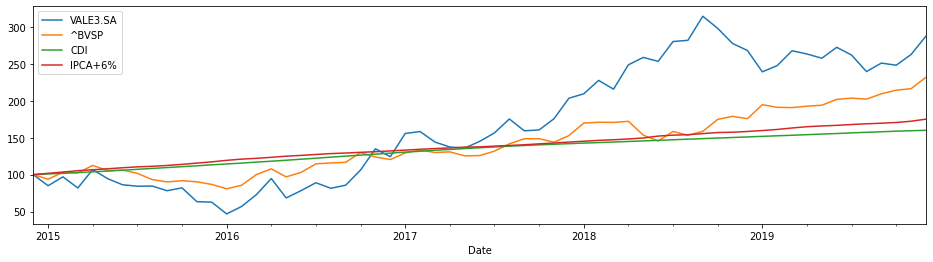

In [17]:
rentabilidade.plot(figsize=(16,4));